In [96]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import griddata

In [85]:

# Ruta donde están almacenados los archivos .csv
ruta_archivos = "Eyetracker Derecho/*.csv"  # Cambia esto a la ruta de tus archivos


In [86]:

# Lista para almacenar los dataframes de cada archivo
dataframes = []
# Leer y agregar cada archivo csv a la lista
for archivo in glob.glob(ruta_archivos):
    df = pd.read_csv(archivo,delimiter=';')
    dataframes.append(df)

# Concatenar todos los dataframes en uno solo
datos_completos = pd.concat(dataframes)

# Agrupar por 'coordenada x' y 'coordenada y', sumando la 'frecuencia de acierto'
resultado = datos_completos.groupby(['coordenada x [mm]', 'coordenada y [mm]'])['aciertos'].sum().reset_index()

# Guardar el resultado en un nuevo archivo CSV
resultado.to_csv("frecuencia_acierto_total.csv", index=False)

print("Archivo 'frecuencia_acierto_total.csv' generado con éxito.")

Archivo 'frecuencia_acierto_total.csv' generado con éxito.


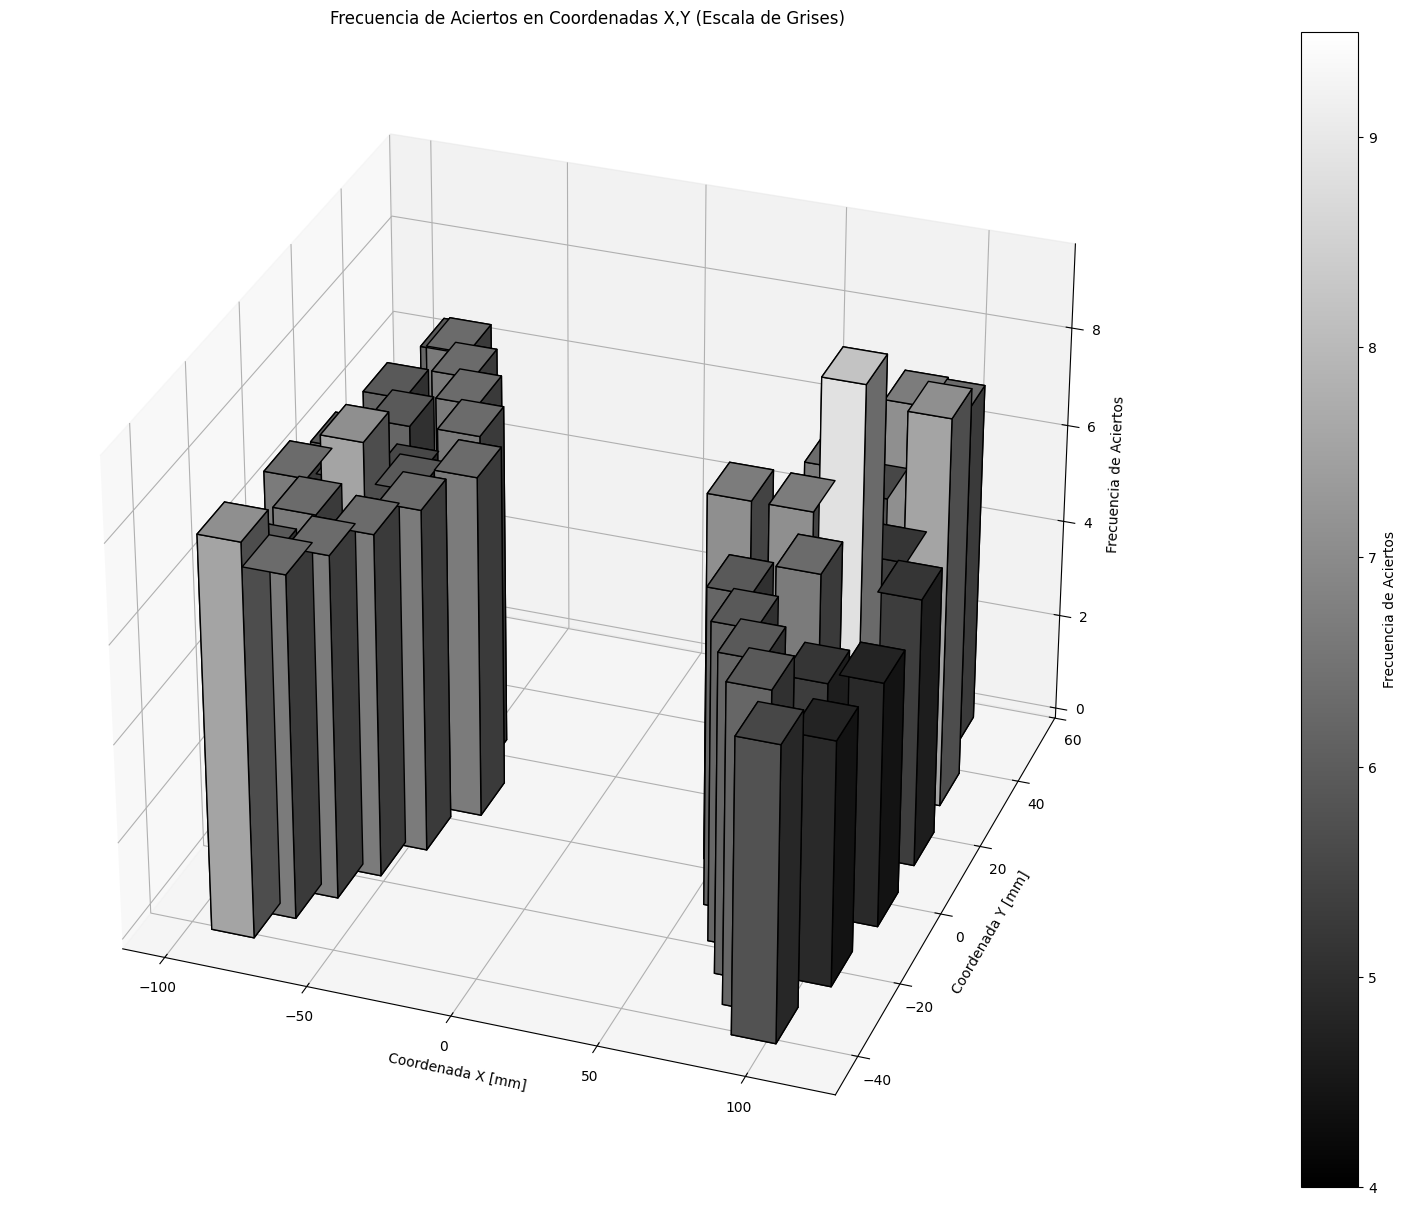

In [92]:
# Cargar el archivo generado previamente
df = pd.read_csv("frecuencia_acierto_total.csv")

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111, projection='3d')

# Asignar las coordenadas x, y y la frecuencia de aciertos
x = df['coordenada x [mm]']
y = df['coordenada y [mm]']
z = df['aciertos']

# Normalizar los valores de frecuencia para usar en una escala de grises
norm = plt.Normalize(z.min(), z.max())
colors = plt.cm.gray(norm(z))

# Graficar las barras en 3D con la escala de grises
ax.bar3d(x, y, np.zeros_like(z), dx=15, dy=10, dz=z, color=colors, edgecolor='k')

# Añadir una barra de color para mostrar la escala de grises
mappable = plt.cm.ScalarMappable(cmap='gray', norm=norm)
mappable.set_array(z)
plt.colorbar(mappable, ax=ax, label='Frecuencia de Aciertos')

# Etiquetas de los ejes
ax.set_xlabel('Coordenada X [mm]')
ax.set_ylabel('Coordenada Y [mm]')
ax.set_zlabel('Frecuencia de Aciertos')

# Ajustar la orientación de la vista
ax.view_init(elev=30, azim=290)

# Título de la gráfica
plt.title("Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)")

# Mostrar la gráfica
plt.show()

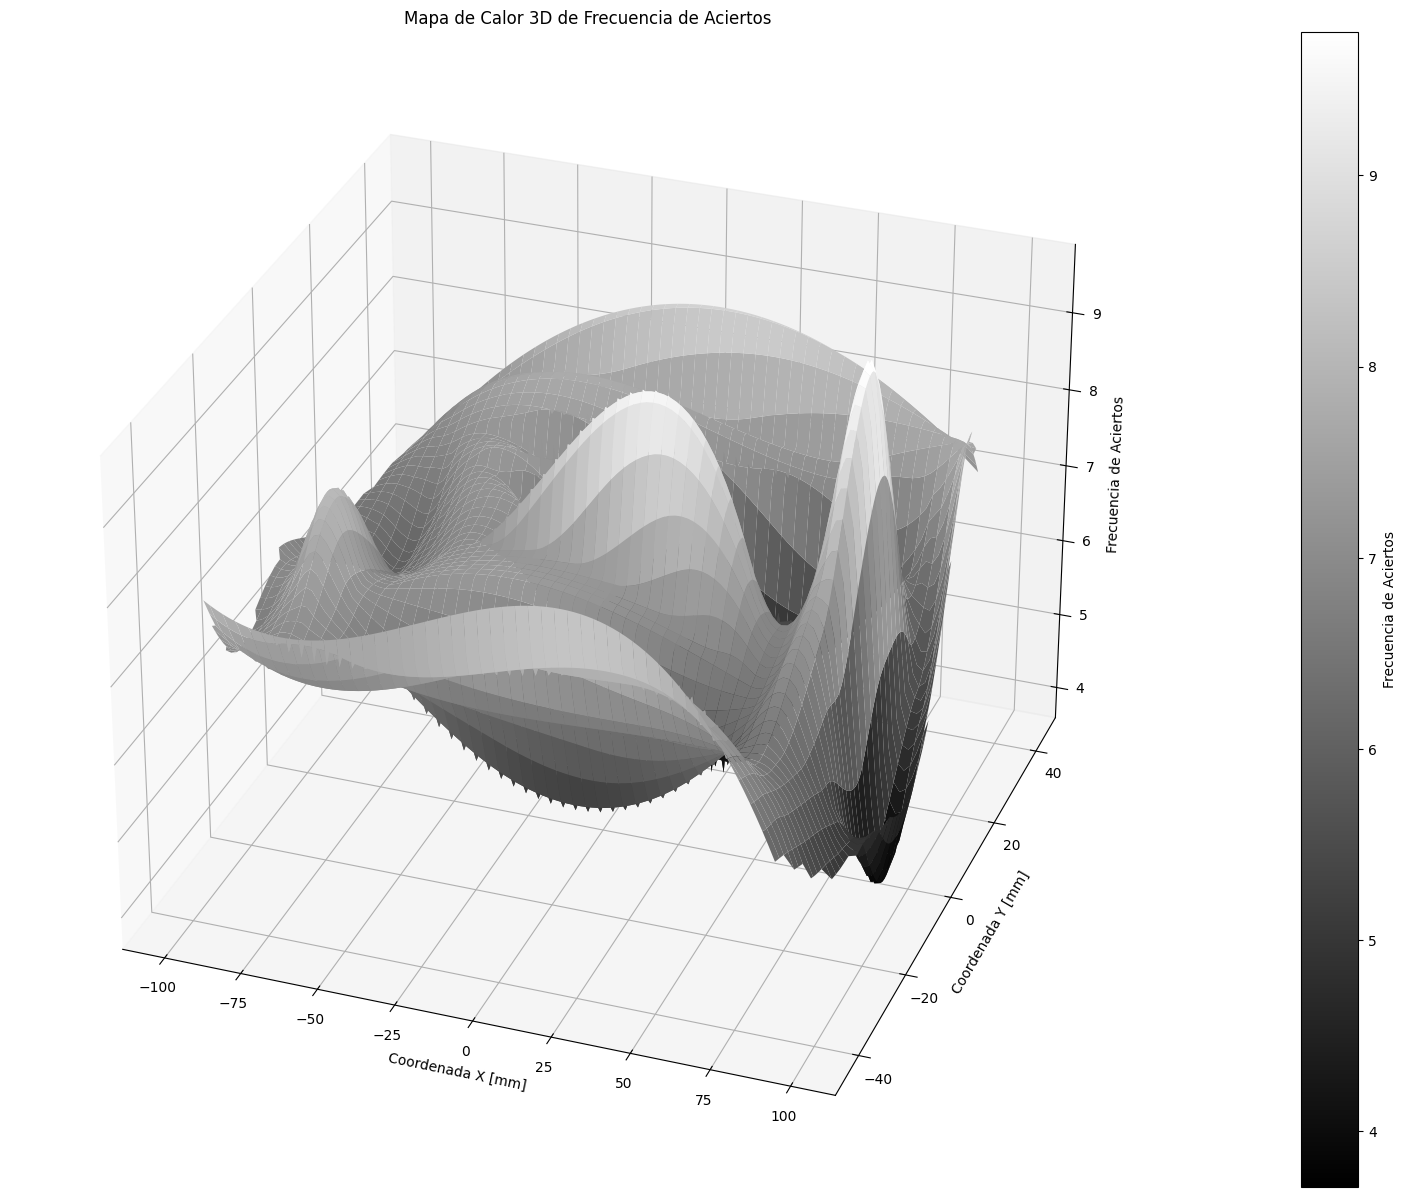

In [99]:
# Extraer las coordenadas y la frecuencia de aciertos
x = df['coordenada x [mm]']
y = df['coordenada y [mm]']
z = df['aciertos']

# Crear una cuadrícula de valores únicos de x e y
x_unique = np.linspace(x.min(), x.max(), 100)
y_unique = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(x_unique, y_unique)

# Interpolar los datos para crear una superficie suave
Z = griddata((x, y), z, (X, Y), method='cubic')

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(35,15))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')

# Añadir una barra de color para mostrar la escala
mappable = plt.cm.ScalarMappable(cmap='gray')
mappable.set_array(Z)
plt.colorbar(mappable, ax=ax, label='Frecuencia de Aciertos')

# Etiquetas de los ejes
ax.set_xlabel('Coordenada X [mm]')
ax.set_ylabel('Coordenada Y [mm]')
ax.set_zlabel('Frecuencia de Aciertos')

# Ajustar la orientación de la vista
ax.view_init(elev=30, azim=290)

# Título de la gráfica
plt.title("Mapa de Calor 3D de Frecuencia de Aciertos")

# Mostrar la gráfica
plt.show()


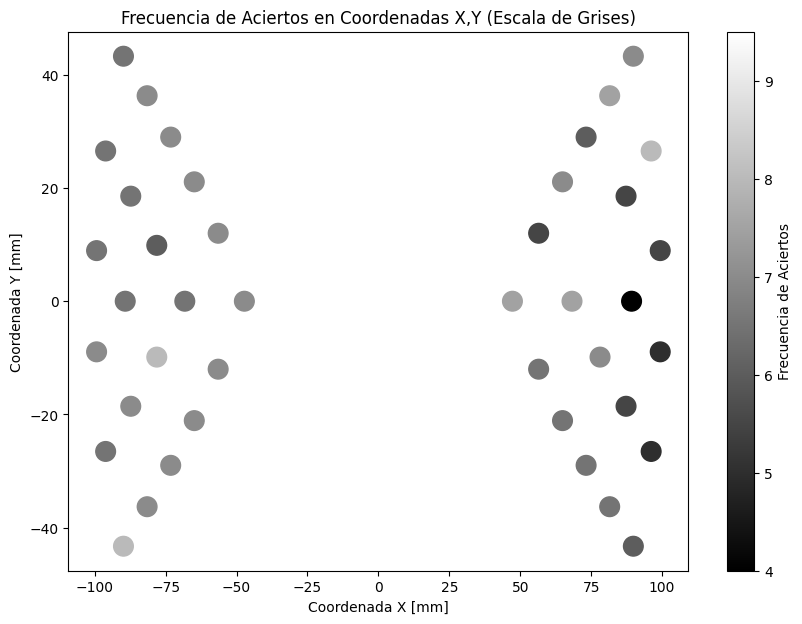

In [93]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 7))
sc = plt.scatter(df['coordenada x [mm]'], df['coordenada y [mm]'], c=df['aciertos'], cmap='gray', s=200)

# Añadir una barra de color para la frecuencia de aciertos
plt.colorbar(sc, label='Frecuencia de Aciertos')

# Etiquetas y título
plt.xlabel('Coordenada X [mm]')
plt.ylabel('Coordenada Y [mm]')
plt.title("Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)")

# Mostrar la gráfica
plt.show()

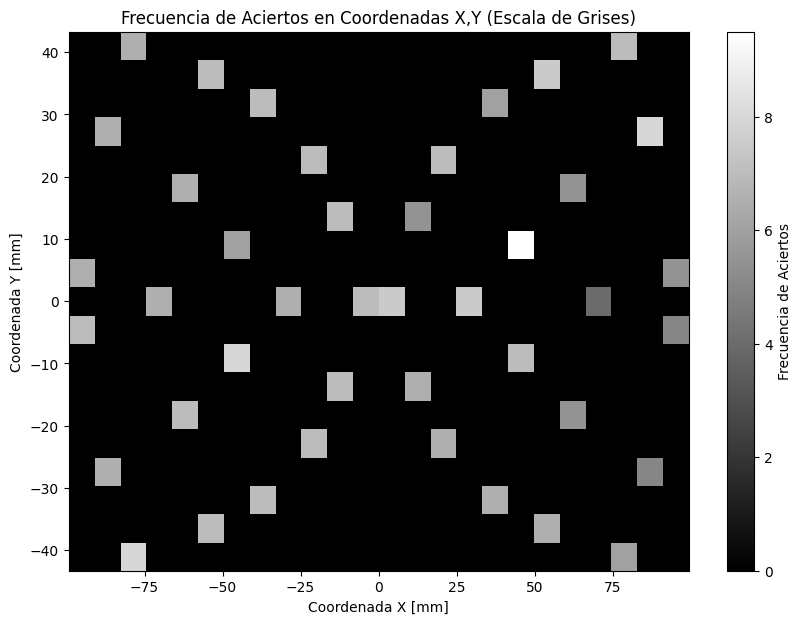

In [56]:
# Crear una cuadrícula de valores únicos de x e y
x_unique = np.sort(df['coordenada x [mm]'].unique())
y_unique = np.sort(df['coordenada y [mm]'].unique())

# Crear una matriz de frecuencia de aciertos con la cuadrícula
frecuencia_matrix = np.zeros((len(y_unique), len(x_unique)))

# Rellenar la matriz con los valores de frecuencia de acierto
for _, row in df.iterrows():
    x_idx = np.where(x_unique == row['coordenada x [mm]'])[0][0]
    y_idx = np.where(y_unique == row['coordenada y [mm]'])[0][0]
    frecuencia_matrix[y_idx, x_idx] = row['aciertos']

# Graficar el mapa de calor en escala de grises
plt.figure(figsize=(10, 7))
plt.imshow(frecuencia_matrix, cmap='gray', extent=(x_unique.min(), x_unique.max(), y_unique.min(), y_unique.max()), origin='lower', aspect='auto')

# Añadir una barra de color para la frecuencia de aciertos
plt.colorbar(label='Frecuencia de Aciertos')

# Etiquetas y título
plt.xlabel('Coordenada X [mm]')
plt.ylabel('Coordenada Y [mm]')
plt.title("Frecuencia de Aciertos en Coordenadas X,Y (Escala de Grises)")

# Mostrar la gráfica
plt.show()